In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import seaborn as sns
plt.style.use('ggplot')

%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn import metrics


In [2]:
data = pd.read_csv("C:/Users/Deniz/Downloads/term-deposit-marketing-2020.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [3]:
dt_cpy = data.copy()

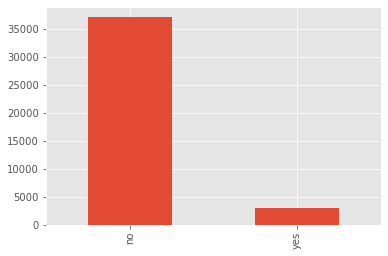

In [4]:
dt_cpy["y"].value_counts().plot(kind='bar');

In [5]:
data["job"] = LabelEncoder().fit_transform(data["job"])
data["marital"] = LabelEncoder().fit_transform(data["marital"])
data["education"] = LabelEncoder().fit_transform(data["education"])
data["housing"] = LabelEncoder().fit_transform(data["housing"])
data["loan"] = LabelEncoder().fit_transform(data["loan"])
data["contact"] = LabelEncoder().fit_transform(data["contact"])
data["month"] = LabelEncoder().fit_transform(data["month"])
data["y"] = LabelEncoder().fit_transform(data["y"])
data["default"] = LabelEncoder().fit_transform(data["default"])

In [ ]:
sns.pairplot(dt_cpy, hue='y');

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 0:13], data.iloc[:,13], 
                                                    test_size = 0.2, random_state=42)

In [7]:
from imblearn.under_sampling import RandomUnderSampler
X_under, y_under = RandomUnderSampler(random_state=42).fit_sample(X_test,y_test)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

#Create Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#Train the model using the training sets
gb.fit(X_under, y_under)

#Predict the response for test dataset
y_pred = gb.predict(X_test)

scores = cross_val_score(gb, X_under, y_under, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.06)


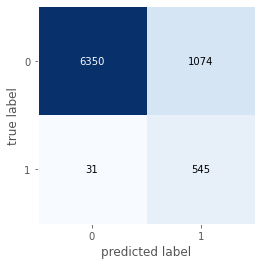

In [11]:
mtxr_undr =confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=mtxr_undr)
plt.show()

In [15]:
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.33662754786905497
Recall: 0.9461805555555556
